In [1]:
#To predict the Doctor's Consulation fee is high or not

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore')
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder


In [3]:
#Importing the libraries

In [4]:
df=pd.read_csv('Drfeeconsultation')
df.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ?250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


In [5]:
#loading the dataset

In [6]:
df.shape

(5961, 7)

In [7]:
#Checking the shape of the dataset- There are 5961 rows and 7 columns

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Qualification       5961 non-null   object
 1   Experience          5961 non-null   object
 2   Rating              2659 non-null   object
 3   Place               5936 non-null   object
 4   Profile             5961 non-null   object
 5   Miscellaneous_Info  3341 non-null   object
 6   Fees                5961 non-null   int64 
dtypes: int64(1), object(6)
memory usage: 326.1+ KB


In [9]:
#Fees is in integer category rest are object type

In [10]:
df.drop('Rating',axis=1,inplace=True)


In [11]:
#We have dropped the rating column as 55 percent of our data is null, if we fill the data with mean, it will distort the accuracy

In [12]:
df["Experience"]= df["Experience"].str.slice(0, 2).astype(float)

In [13]:
#Changing experience to float data type

In [14]:
df['Place']=df['Place'].fillna(df['Place'].mode()[0])

In [15]:
#Filling the null values of place with mode

In [16]:
df[['Locality','City']] = df['Place'].str.split(',',n=1, expand=True)

In [17]:
#Splitting the place into columns Locality and City for more accuracy

In [18]:
df[['Qualification1','Qualification2']]=df['Qualification'].str.split(',',n=1, expand=True)

In [19]:
#Splitting the qualification into two new columns-'Qualification1','Qualification2' for better accuracy

In [20]:
df['Miscellaneous_Info'].str.split(n=3, expand=True).head()

,0,1,2,3
0,100%,16,Feedback,"Kakkanad, Ernakulam"
1,98%,76,Feedback,"Whitefield, Bangalore"
2,NaN,NaN,NaN,NaN
3,Bannerghatta,"Road,",Bangalore,"?250 Available on Sun, 10 Feb"
4,100%,4,Feedback,"Keelkattalai, Chennai"


In [21]:
# On analysis,To much of null values,inconsistent data, too many repetative informations, which are provided seprately,hence dropping the column

In [22]:
col=['Qualification','Place','Miscellaneous_Info']
df.drop(df[col],axis=1,inplace=True)

In [23]:
#Dropping the main column as we have derived new columns and insights from it

In [24]:
df.head()

,Experience,Profile,Fees,Locality,City,Qualification1,Qualification2
0,24.0,Homeopath,100,Kakkanad,Ernakulam,BHMS,MD - Homeopathy
1,12.0,Ayurveda,350,Whitefield,Bangalore,BAMS,MD - Ayurveda Medicine
2,9.0,ENT Specialist,300,Mathikere - BEL,Bangalore,MBBS,MS - Otorhinolaryngology
3,12.0,Ayurveda,250,Bannerghatta Road,Bangalore,BSc - Zoology,BAMS
4,20.0,Ayurveda,250,Keelkattalai,Chennai,BAMS,None


In [25]:
#Checking the new dataset

In [26]:
df.isnull().sum()

Experience           0
Profile              0
Fees                 0
Locality             0
City                 1
Qualification1       0
Qualification2    1962
dtype: int64

In [27]:
#now checking the null values and filling the data with mode as they are categorical in nature

In [28]:
df.shape

(5961, 7)

In [29]:
#Filled null value of the city

In [30]:
df['City'].mode()[0]

' Bangalore'

In [31]:
df['City']=df['City'].fillna(df['City'].mode()[0])

In [32]:
#we have dropped Qualification2 as 67 percent of data is null

In [33]:
df_new=df.drop('Qualification2',axis=1)

In [34]:
df_new.isnull().sum()

Experience        0
Profile           0
Fees              0
Locality          0
City              0
Qualification1    0
dtype: int64

In [35]:
#Checking the null values

In [36]:
for column in df_new.columns:
    if df[column].dtype==object:
        print(str(column),':',str(df[column].unique()))
        print(df[column].value_counts())
        print('*******************************************')
        print('\n')

Profile : ['Homeopath' 'Ayurveda' 'ENT Specialist' 'Dentist' 'General Medicine'
 'Dermatologists']
Dentist             1397
General Medicine    1173
Dermatologists      1034
Homeopath            843
Ayurveda             786
ENT Specialist       728
Name: Profile, dtype: int64
*******************************************


Locality : ['Kakkanad' 'Whitefield' 'Mathikere - BEL' 'Bannerghatta Road'
 'Keelkattalai' 'Porur' 'Karol Bagh' 'Arekere' 'Old City' 'Athani'
 'Thousand Lights' 'Somajiguda' 'Coimbatore Racecourse' 'Jubilee Hills'
 'Kondli' 'Saroor Nagar' 'Tambaram West' 'Purasawakkam' 'KPHB'
 'HSR Layout' 'Pollachi' 'Vasundhra Enclave' 'Chembur' 'Thammanam'
 'Andheri' 'Pattom' 'Kukatpally' 'Vadavalli' 'Defence Colony'
 'Banjara Hills' 'Sion West' 'CR Park' 'Mogappair East' 'IP Extension'
 'Safdarjung Enclave' 'New Friends Colony' 'Borivali West' 'Saket' 'Malad'
 'Hyder Nagar' 'Dahisar West' 'RT Nagar' 'Powai' 'Basheerbagh'
 'Musheerabad' 'AS Rao Nagar' 'Madhapur' 'Gandhinagar' 'Chetpet

In [37]:
#Checking the unique object column variable through loop

In [38]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Experience      5961 non-null   float64
 1   Profile         5961 non-null   object 
 2   Fees            5961 non-null   int64  
 3   Locality        5961 non-null   object 
 4   City            5961 non-null   object 
 5   Qualification1  5961 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 279.5+ KB


In [39]:
#all are now numeric

In [40]:
df_new.describe()

,Experience,Fees
count,5961.000000,5961.000000
mean,17.303976,307.944640
std,11.142798,190.920373
min,0.000000,5.000000
25%,9.000000,150.000000
50%,14.000000,300.000000
75%,23.000000,500.000000
max,66.000000,950.000000


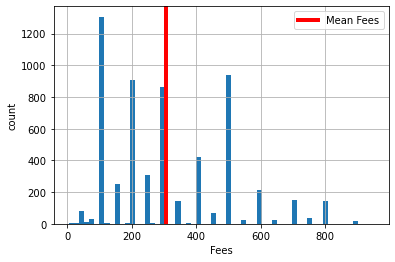

In [41]:
Fees=df_new['Fees'].hist(bins=60)
mean_val=np.mean(df_new['Fees'])
plt.axvline(mean_val,linewidth=4,color='red',label='Mean Fees')
plt.xlabel('Fees')
plt.ylabel('count')
plt.legend()
plt.show()

In [42]:
#Mean of fees is somewhat around 300

{'bodies': [<matplotlib.collections.PolyCollection at 0x24e1f2130d0>],
 'cmeans': <matplotlib.collections.LineCollection at 0x24e1f205ee0>,
 'cmaxes': <matplotlib.collections.LineCollection at 0x24e1f213580>,
 'cmins': <matplotlib.collections.LineCollection at 0x24e1f213880>,
 'cbars': <matplotlib.collections.LineCollection at 0x24e1f213b80>}

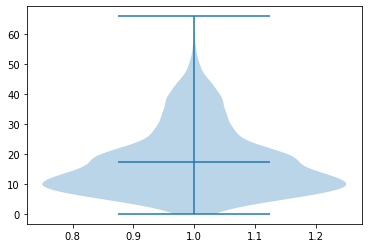

In [43]:
plt.violinplot(df['Experience'],showmeans=True)

In [44]:
#Maximum experience lies between 10 to 20 years

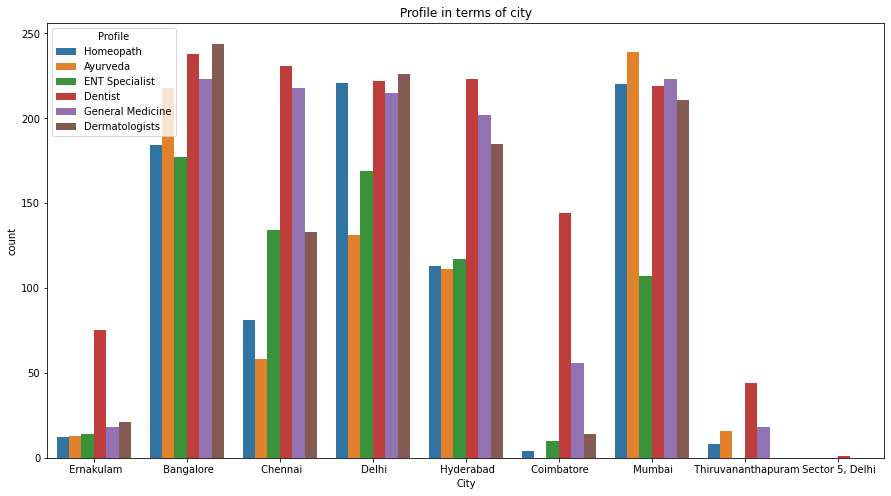

In [45]:
plt.figure(figsize=(15,8))
sns.countplot(x='City',hue='Profile',data=df)
plt.title("Profile in terms of city")
plt.show()

In [46]:
#maximum profile of doctors exits in bangalore,chennai,delhi,Hyberabad,Mumbai(in metropololitan cities, among them Densits,general medicine
#dermatologist and in some Mumbai-Ayurveda is highest)

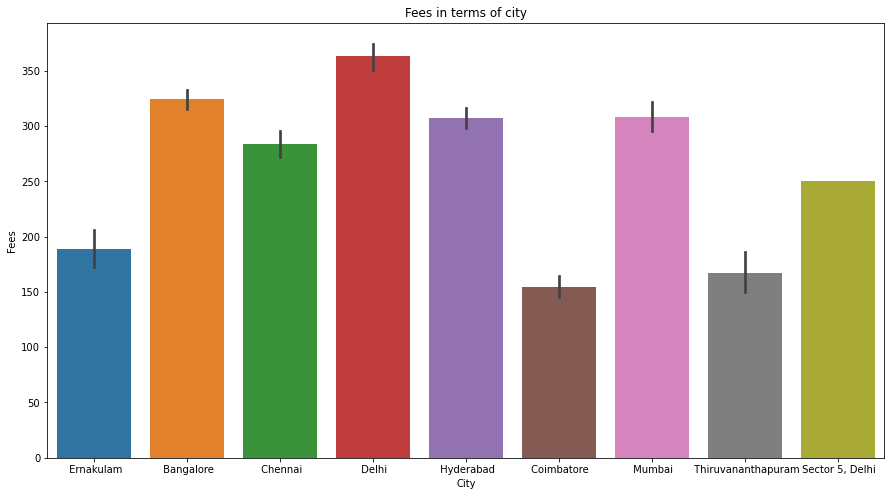

In [47]:
plt.figure(figsize=(15,8))
sns.barplot(x='City',y='Fees',data=df)
plt.title("Fees in terms of city")
plt.show()

In [48]:
#maximm fees is charged in Delhi,Bangalore second and Mumbai third

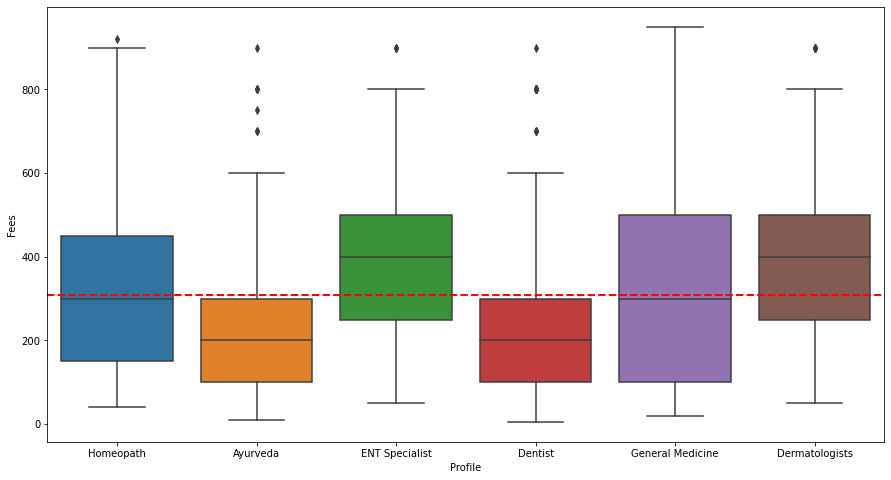

In [49]:
plt.figure(figsize=(15,8))
mean_price=np.mean(df['Fees'])
sns.boxplot(x='Profile',y='Fees',data=df)
plt.axhline(mean_price,color='r',linestyle='dashed',linewidth=2)
plt.show()

In [50]:
#Ent Specialist,General Medicine and Dermatologits have the maximum fees
#Ayurveda and Denists have high outliers

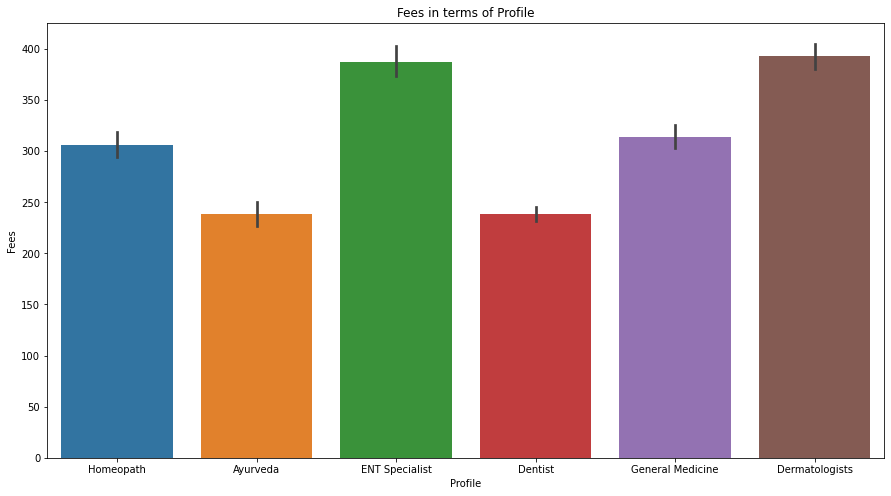

In [51]:
plt.figure(figsize=(15,8))
sns.barplot(x='Profile',y='Fees',data=df)
plt.title("Fees in terms of Profile")
plt.show()

In [52]:
#Ent specialist,Dermatologists have the maximum fees rate

In [53]:
print(df['City'].value_counts())

 Bangalore             1284
 Mumbai                1219
 Delhi                 1184
 Hyderabad              951
 Chennai                855
 Coimbatore             228
 Ernakulam              153
 Thiruvananthapuram      86
 Sector 5, Delhi          1
Name: City, dtype: int64


In [54]:
#Source vs Fees, Bangalore have the maximum count, followed by Mumbai

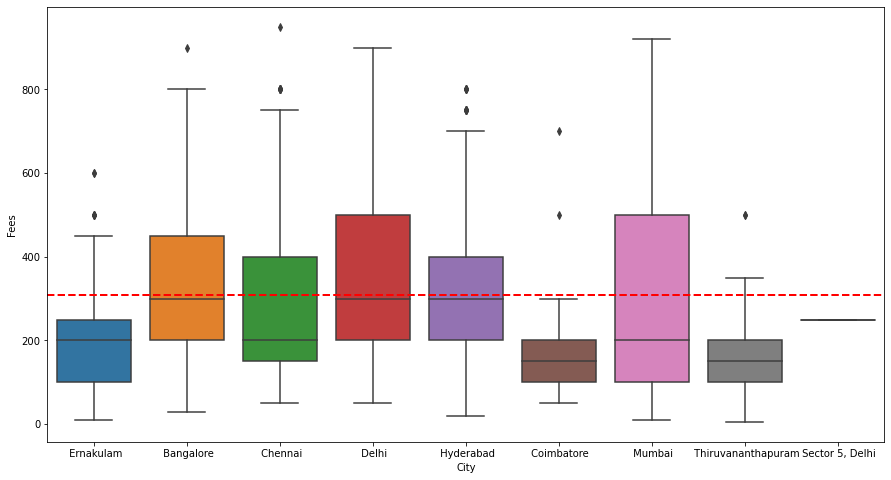

In [55]:
plt.figure(figsize=(15,8))
mean_price=np.mean(df['Fees'])
sns.boxplot(x='City',y='Fees',data=df)
plt.axhline(mean_price,color='r',linestyle='dashed',linewidth=2)
plt.show()

In [56]:
#Fees in metropolitatn cities is high to other cities
#cities of kerala has low fee rate

In [57]:
#Changing catergorical nominal data through dummies

In [58]:
Profile =df_new['Profile']
Profile=pd.get_dummies(Profile,drop_first=True)
Profile.head()

,Dentist,Dermatologists,ENT Specialist,General Medicine,Homeopath
0,0,0,0,0,1
1,0,0,0,0,0
2,0,0,1,0,0
3,0,0,0,0,0
4,0,0,0,0,0


In [59]:
Locality=df_new['Locality']
Locality=pd.get_dummies(Locality,drop_first=True)
Locality.head()

,AS Rao Nagar,Abbigere,Abhiramapuram,Abids,Adambakkam,Adarsh Nagar,Adugodi,Adyar,Afzalgunj,Agaram,...,Wilson Garden,Worli,Yakutpura,Yamuna Vihar,Yelahanka,Yelahanka New Town,Yellareddyguda,Yeshwanthpur,Yousufguda,e
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [60]:
City=df_new['City']
City=pd.get_dummies(City,drop_first=True)
City.head()

,Chennai,Coimbatore,Delhi,Ernakulam,Hyderabad,Mumbai,"Sector 5, Delhi",Thiruvananthapuram
0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0


In [61]:
Qualification1=df_new['Qualification1']
Qualification1=pd.get_dummies(Qualification1,drop_first=True)
Qualification1.head()

,Advanced Certificate Course in Aesthetic Dentistry,Ayurvedic panchkarma,B.Ac,B.Sc,BAMS,BDS,BEMS,BHMS,BIMS,BSAM,...,PhD - Neuropsychology,PhD - Orthodontics & Dentofacial Orthopaedics,Post Doctoral Fellowship in Diabetology,Post Graduate Diploma in Dermotology (PGDD),Post Graduate Diploma in Diabetic Education,Post Graduate Diploma in Diabetology (PGDD),Post Graduate Diploma in Healthcare Management(PGDHM),Post Graduate Diploma in Periodontics and Implantology,Post MD SR AIIMS,Training in Facial Aesthetics
0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [62]:
c=pd.concat([df_new,Profile,Locality,City,Qualification1],axis=1)

In [63]:
#collating both the orignal file with new columns

In [64]:
c.head()

,Experience,Profile,Fees,Locality,City,Qualification1,Dentist,Dermatologists,ENT Specialist,General Medicine,...,PhD - Neuropsychology,PhD - Orthodontics & Dentofacial Orthopaedics,Post Doctoral Fellowship in Diabetology,Post Graduate Diploma in Dermotology (PGDD),Post Graduate Diploma in Diabetic Education,Post Graduate Diploma in Diabetology (PGDD),Post Graduate Diploma in Healthcare Management(PGDHM),Post Graduate Diploma in Periodontics and Implantology,Post MD SR AIIMS,Training in Facial Aesthetics
0,24.0,Homeopath,100,Kakkanad,Ernakulam,BHMS,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,12.0,Ayurveda,350,Whitefield,Bangalore,BAMS,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,9.0,ENT Specialist,300,Mathikere - BEL,Bangalore,MBBS,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,12.0,Ayurveda,250,Bannerghatta Road,Bangalore,BSc - Zoology,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,20.0,Ayurveda,250,Keelkattalai,Chennai,BAMS,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [65]:
c.drop(['Profile','Locality','City','Qualification1'],axis=1,inplace=True)
c.head()

,Experience,Fees,Dentist,Dermatologists,ENT Specialist,General Medicine,Homeopath,AS Rao Nagar,Abbigere,Abhiramapuram,...,PhD - Neuropsychology,PhD - Orthodontics & Dentofacial Orthopaedics,Post Doctoral Fellowship in Diabetology,Post Graduate Diploma in Dermotology (PGDD),Post Graduate Diploma in Diabetic Education,Post Graduate Diploma in Diabetology (PGDD),Post Graduate Diploma in Healthcare Management(PGDHM),Post Graduate Diploma in Periodontics and Implantology,Post MD SR AIIMS,Training in Facial Aesthetics
0,24.0,100,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,12.0,350,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,9.0,300,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,12.0,250,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,20.0,250,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [66]:
c.shape

(5961, 1030)

In [67]:
c.describe()

,Experience,Fees,Dentist,Dermatologists,ENT Specialist,General Medicine,Homeopath,AS Rao Nagar,Abbigere,Abhiramapuram,...,PhD - Neuropsychology,PhD - Orthodontics & Dentofacial Orthopaedics,Post Doctoral Fellowship in Diabetology,Post Graduate Diploma in Dermotology (PGDD),Post Graduate Diploma in Diabetic Education,Post Graduate Diploma in Diabetology (PGDD),Post Graduate Diploma in Healthcare Management(PGDHM),Post Graduate Diploma in Periodontics and Implantology,Post MD SR AIIMS,Training in Facial Aesthetics
count,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,...,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000
mean,17.303976,307.944640,0.234357,0.173461,0.122127,0.196779,0.141419,0.002684,0.000336,0.000336,...,0.000168,0.001174,0.000168,0.000168,0.000168,0.000168,0.000168,0.000168,0.000168,0.000168
std,11.142798,190.920373,0.423632,0.378677,0.327460,0.397597,0.348483,0.051743,0.018316,0.018316,...,0.012952,0.034251,0.012952,0.012952,0.012952,0.012952,0.012952,0.012952,0.012952,0.012952
min,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.000000,150.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,14.000000,300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,23.000000,500.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,66.000000,950.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [68]:
#There is not much differnce between mean and median
#difference lies between 75 quartile and maximum range

In [69]:
c_corr=c.corr()
c_corr

,Experience,Fees,Dentist,Dermatologists,ENT Specialist,General Medicine,Homeopath,AS Rao Nagar,Abbigere,Abhiramapuram,...,PhD - Neuropsychology,PhD - Orthodontics & Dentofacial Orthopaedics,Post Doctoral Fellowship in Diabetology,Post Graduate Diploma in Dermotology (PGDD),Post Graduate Diploma in Diabetic Education,Post Graduate Diploma in Diabetology (PGDD),Post Graduate Diploma in Healthcare Management(PGDHM),Post Graduate Diploma in Periodontics and Implantology,Post MD SR AIIMS,Training in Facial Aesthetics
Experience,1.000000,0.002117,-0.201596,-0.096003,0.082435,0.335864,-0.070010,-0.006654,-0.011188,0.015121,...,0.000809,0.000383,-0.009654,-0.013142,0.017085,-0.003841,0.026386,-0.014304,-0.007329,-0.016629
Fees,0.002117,1.000000,-0.202126,0.204426,0.155084,0.015463,-0.003072,0.002087,-0.019955,-0.000762,...,0.006246,0.003705,0.002854,-0.003932,0.013031,-0.014109,0.013031,-0.010717,0.026602,-0.000539
Dentist,-0.201596,-0.202126,1.000000,-0.253451,-0.206355,-0.273840,-0.224538,-0.005739,-0.010136,-0.010136,...,-0.007166,0.061975,-0.007166,-0.007166,-0.007166,-0.007166,-0.007166,0.023413,-0.007166,-0.007166
Dermatologists,-0.096003,0.204426,-0.253451,1.000000,-0.170867,-0.226747,-0.185923,0.036176,-0.008393,-0.008393,...,-0.005934,-0.015708,-0.005934,0.028275,-0.005934,-0.005934,-0.005934,-0.005934,0.028275,-0.005934
ENT Specialist,0.082435,0.155084,-0.206355,-0.170867,1.000000,-0.184613,-0.151375,-0.019350,-0.006833,-0.006833,...,-0.004831,-0.012789,-0.004831,-0.004831,-0.004831,-0.004831,-0.004831,-0.004831,-0.004831,0.034729
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Post Graduate Diploma in Diabetology (PGDD),-0.003841,-0.014109,-0.007166,-0.005934,-0.004831,0.026170,-0.005257,-0.000672,-0.000237,-0.000237,...,-0.000168,-0.000444,-0.000168,-0.000168,-0.000168,1.000000,-0.000168,-0.000168,-0.000168,-0.000168
Post Graduate Diploma in Healthcare Management(PGDHM),0.026386,0.013031,-0.007166,-0.005934,-0.004831,0.026170,-0.005257,-0.000672,-0.000237,-0.000237,...,-0.000168,-0.000444,-0.000168,-0.000168,-0.000168,-0.000168,1.000000,-0.000168,-0.000168,-0.000168
Post Graduate Diploma in Periodontics and Implantology,-0.014304,-0.010717,0.023413,-0.005934,-0.004831,-0.006411,-0.005257,-0.000672,-0.000237,-0.000237,...,-0.000168,-0.000444,-0.000168,-0.000168,-0.000168,-0.000168,-0.000168,1.000000,-0.000168,-0.000168
Post MD SR AIIMS,-0.007329,0.026602,-0.007166,0.028275,-0.004831,-0.006411,-0.005257,-0.000672,-0.000237,-0.000237,...,-0.000168,-0.000444,-0.000168,-0.000168,-0.000168,-0.000168,-0.000168,-0.000168,1.000000,-0.000168


In [70]:
#Correlation rate in regards to fees in not so high with other columns

In [71]:
#Splitting the data into x and y

In [72]:
x=c.drop(columns=['Fees'],axis=1)
x.head()

,Experience,Dentist,Dermatologists,ENT Specialist,General Medicine,Homeopath,AS Rao Nagar,Abbigere,Abhiramapuram,Abids,...,PhD - Neuropsychology,PhD - Orthodontics & Dentofacial Orthopaedics,Post Doctoral Fellowship in Diabetology,Post Graduate Diploma in Dermotology (PGDD),Post Graduate Diploma in Diabetic Education,Post Graduate Diploma in Diabetology (PGDD),Post Graduate Diploma in Healthcare Management(PGDHM),Post Graduate Diploma in Periodontics and Implantology,Post MD SR AIIMS,Training in Facial Aesthetics
0,24.0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,12.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,9.0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,12.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,20.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [73]:
y=c['Fees']
y.head()

0    100
1    350
2    300
3    250
4    250
Name: Fees, dtype: int64

In [74]:
y.shape

(5961,)

In [75]:
#checking the shape of y

In [76]:
x.shape

(5961, 1029)

In [77]:
#checking the shape of x

In [78]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)

In [79]:
#scaling the dataset through standardScaler

In [80]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=42)

In [81]:
#Splitting the dataset into x and y in the ratio of 80(train data) and 20(test data)
#checking the shapes below

In [82]:
print(x_train.shape,'\t','\t',x_test.shape)

(4768, 1029) 	 	 (1193, 1029)


In [83]:
print(y_train.shape,'\t','\t',y_test.shape)

(4768,) 	 	 (1193,)


In [84]:
#Importing all the model Library
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

#Importing all the Boosting models
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

#Importing error metrics
from sklearn.model_selection import GridSearchCV,cross_val_score
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [85]:
model=[LinearRegression(),SVR(),DecisionTreeRegressor(),KNeighborsRegressor(),Lasso(),Ridge(),ElasticNet(),
       RandomForestRegressor(),AdaBoostRegressor(),GradientBoostingRegressor()]

for m in model:
    m.fit(x_train,y_train)
    score=m.score(x_train,y_train)
    predm=m.predict(x_test)
    print('Score of ',m,'is:')
    print('MAE :',mean_absolute_error(y_test,predm))
    print('MSE :',mean_squared_error(y_test,predm))
    print('RSME :',np.sqrt(mean_squared_error(y_test,predm)))
    print('R2_score :',r2_score(y_test,predm)*100)
    print('**************************************************')
    print('\n')

Score of  LinearRegression() is:
MAE : 1.2023384147374598e+16
MSE : 3.13903361133391e+33
RSME : 5.602707926827803e+16
R2_score : -9.112760578611785e+30
**************************************************


Score of  SVR() is:
MAE : 148.32185225108643
MSE : 34413.52284267545
RSME : 185.5088214686176
R2_score : 0.09594252205985532
**************************************************


Score of  DecisionTreeRegressor() is:
MAE : 143.77060631461302
MSE : 44268.89494272143
RSME : 210.40174652963657
R2_score : -28.514661084279226
**************************************************


Score of  KNeighborsRegressor() is:
MAE : 132.26186085498742
MSE : 28661.294216261525
RSME : 169.2964684104826
R2_score : 16.794929776188695
**************************************************


Score of  Lasso() is:
MAE : 123.54027400411456
MSE : 25958.960188673103
RSME : 161.11784565551113
R2_score : 24.63993115111328
**************************************************


Score of  Ridge() is:
MAE : 130.1757750640428


In [86]:
#Lasso gives the best score both in r2 and cross val score

In [87]:
model=[LinearRegression(),SVR(),DecisionTreeRegressor(),KNeighborsRegressor(),Lasso(),Ridge(),ElasticNet(),
       RandomForestRegressor(),AdaBoostRegressor(),GradientBoostingRegressor()]

for m in model:
    score=cross_val_score(m,x,y,cv=10,scoring='r2')
    print('Model:',m)
    print('Score:',score)
    print('Mean Score:',score.mean())
    print('Standard Deviation:',score.std())
    print('**************************************************')
    print('\n')

Model: LinearRegression()
Score: [-1.85440918e+28 -8.92177866e+27 -6.68842380e+26 -1.36879701e+28
 -3.39513158e+28 -8.91499915e+27 -3.37328408e+27 -3.07417591e+27
 -1.47264381e+28 -2.56434698e+28]
Mean Score: -1.3150636575780601e+28
Standard Deviation: 1.004664674410692e+28
**************************************************


Model: SVR()
Score: [ 0.02683963  0.00672483  0.0118537   0.00177867  0.00275829  0.02165927
 -0.00352488 -0.00282085  0.00477332  0.01018152]
Mean Score: 0.008022349079613888
Standard Deviation: 0.009429972829166406
**************************************************


Model: DecisionTreeRegressor()
Score: [-0.36270264 -0.28860224 -0.20542961 -0.20308249 -0.16890805 -0.11594386
 -0.22134805 -0.17383579 -0.26479986 -0.3600199 ]
Mean Score: -0.23646724850291187
Standard Deviation: 0.07748594882390376
**************************************************


Model: KNeighborsRegressor()
Score: [-0.00735299  0.08826754  0.09479693  0.13043487  0.15310339  0.13258347
  0.14

In [88]:
#Both in r2score and cross val score we see Lasso is the best model, so we will save the model

In [89]:
parameters={'alpha':[1.0,0.1,0.001],
           'fit_intercept':['True','False'],
           'max_iter':[500,700,900]}

In [90]:
ls=Lasso()

In [91]:
clf = GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'alpha': 1.0, 'fit_intercept': 'True', 'max_iter': 500}


In [92]:
pred=clf.predict(x_test)
print("Final accuracy :",r2_score(y_test,pred)*100)

Final accuracy : 24.63993115111328


In [93]:
import joblib
filename='model.pkl'
joblib.dump(clf,open(filename,'wb'))